In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
def sin_wave(amp, freq, time):
    return amp * np.sin(2*np.pi*freq*time)

In [4]:
time = np.arange(0, 10, 0.001)
sin1 = sin_wave(1, 10, time)
sin2 = sin_wave(2, 5, time)
sin3 = sin_wave(4, 1, time)

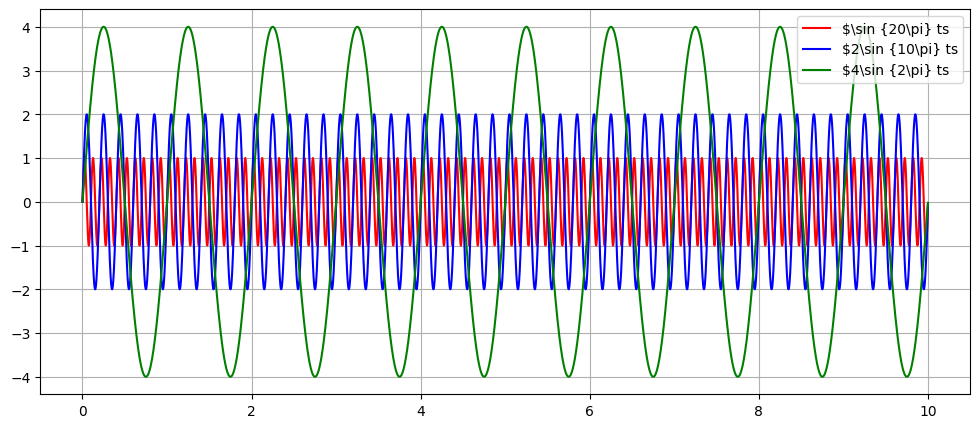

In [5]:
plt.figure(figsize=(12,5))
plt.plot(time, sin1, label=r"$\sin {20\pi} ts", color='red')
plt.plot(time, sin2, label=r"$2\sin {10\pi} ts", color='blue')
plt.plot(time, sin3, label=r"$4\sin {2\pi} ts", color='green')
plt.legend(); plt.grid(); plt.show()

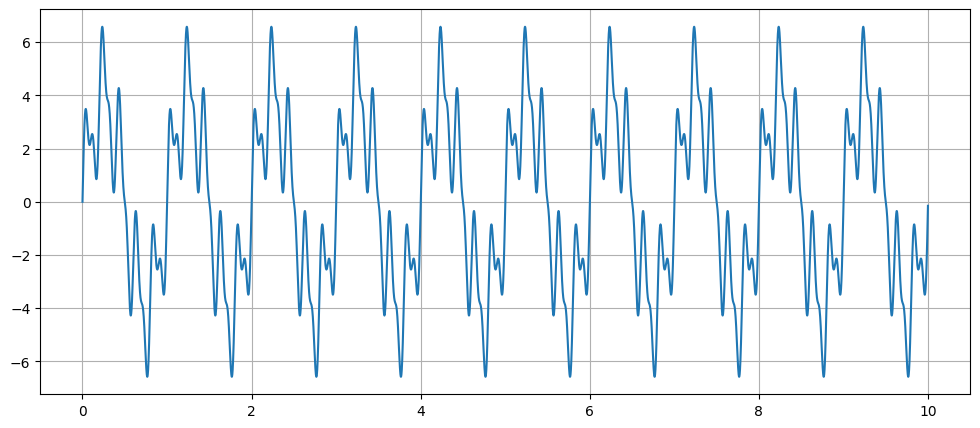

In [6]:
sin_sum = sin1 + sin2 + sin3

plt.figure(figsize=(12,5))
plt.plot(time, sin_sum)
plt.grid()
plt.show()

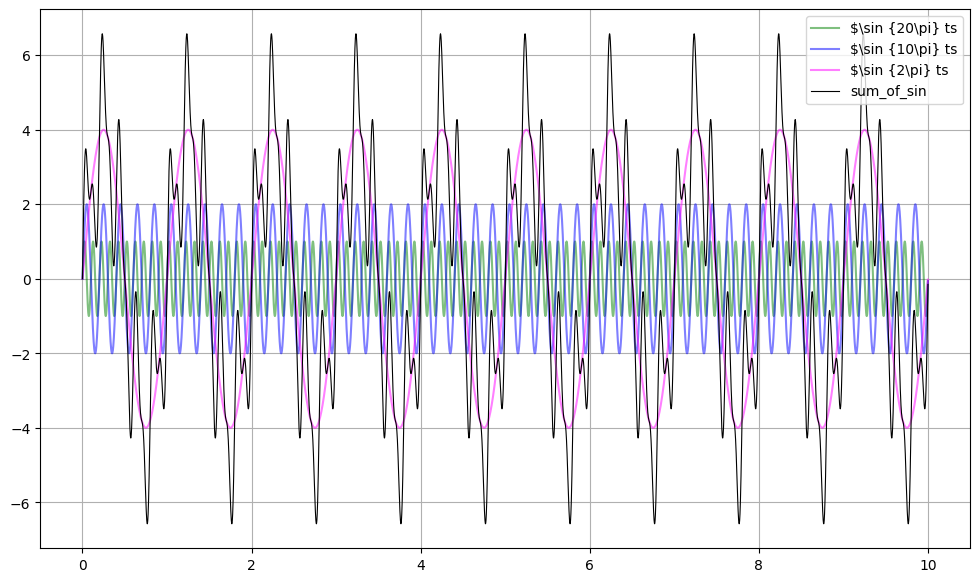

In [7]:
plt.figure(figsize=(12,7))
plt.plot(time, sin1, label=r"$\sin {20\pi} ts", color='green', alpha=0.5)
plt.plot(time, sin2, label=r"$\sin {10\pi} ts", color='blue', alpha=0.5)
plt.plot(time, sin3, label=r"$\sin {2\pi} ts", color='magenta', alpha=0.5)
plt.plot(time, sin_sum, label="sum_of_sin", color='black', lw=0.8)
plt.legend(); plt.grid(); plt.show()

In [8]:
n = len(sin_sum)
k = np.arange(n)
Fs = 1/0.001
T = n/Fs
freq = k/T
freq = freq[range(int(n/2))]

In [9]:
Y = np.fft.fft(sin_sum)/n
Y = Y[range(int(n/2))]

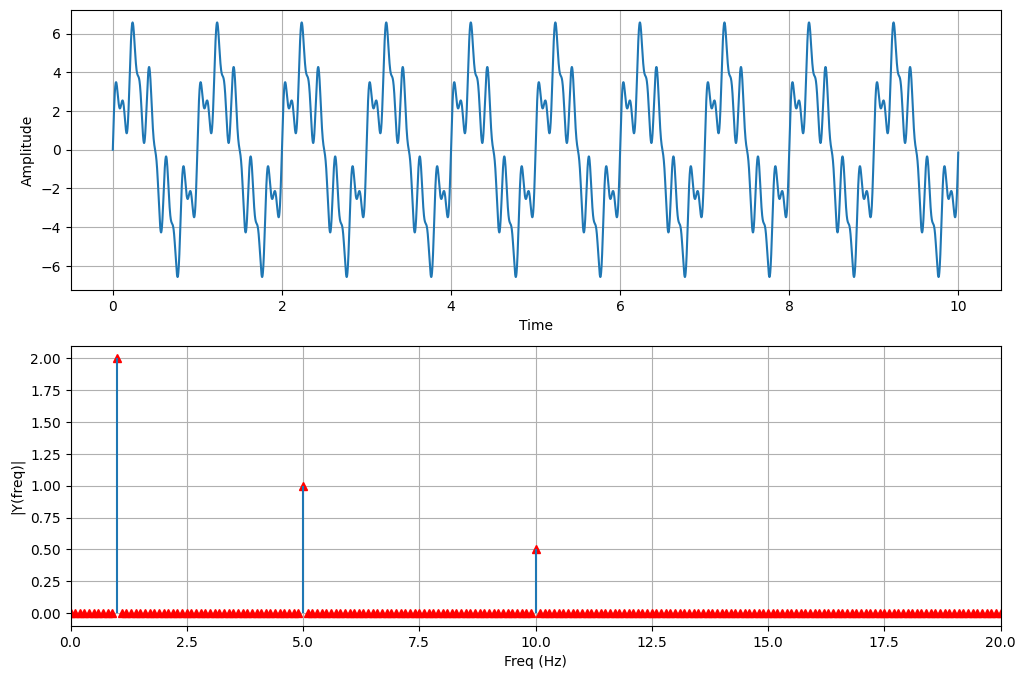

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(time, sin_sum)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude'); ax[0].grid(True)
ax[1].plot(freq, abs(Y), 'r', linestyle=' ', marker='^')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].vlines(freq, [0], abs(Y))
ax[1].set_xlim([0, 20]); ax[1].grid(True)
plt.show()

In [12]:
sin_concat = np.concatenate((sin1, sin2, sin3, sin_sum))

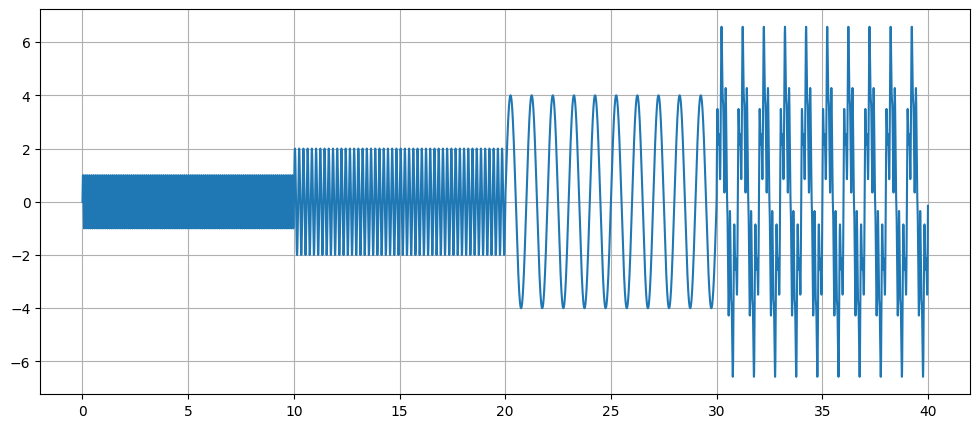

In [13]:
time = np.arange(0, 40, 0.001)

plt.figure(figsize=(12,5))
plt.plot(time, sin_concat)
plt.grid()
plt.show()

In [14]:
n = len(sin_concat)
k = np.arange(n)
Fs = 1/0.001
T = n/Fs
freq = k/T
freq = freq[range(int(n/2))]
Y = np.fft.fft(sin_concat)/n
Y = Y[range(int(n/2))]

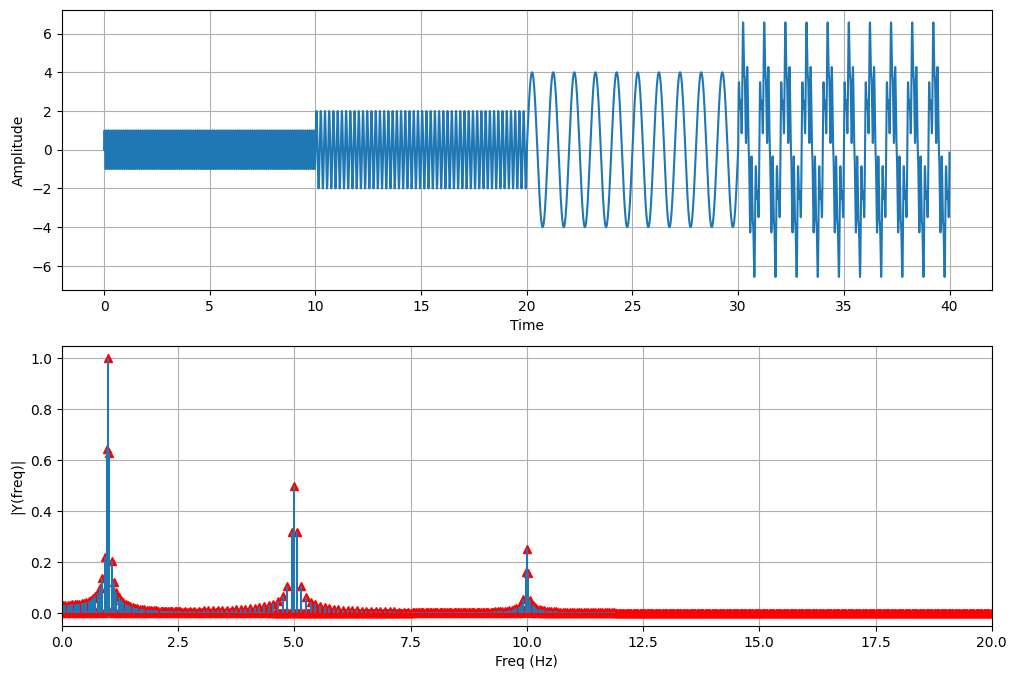

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(time, sin_concat)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude'); ax[0].grid(True)
ax[1].plot(freq, abs(Y), 'r', linestyle=' ', marker='^')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].vlines(freq, [0], abs(Y))
ax[1].set_xlim([0, 20]); ax[1].grid(True)
plt.show()

In [17]:
def draw_stft(f, t, Zxx):
    plt.figure(figsize=(12,5))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1, shading='gouraud')
    plt.title('STFT Magnitude'); plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]'); plt.ylim([0, 20]); plt.show()

In [19]:
def calc_stft(nperseg):
    f, t, Zxx = signal.stft(sin_concat, Fs, nperseg=nperseg)
    draw_stft(f, t, Zxx)

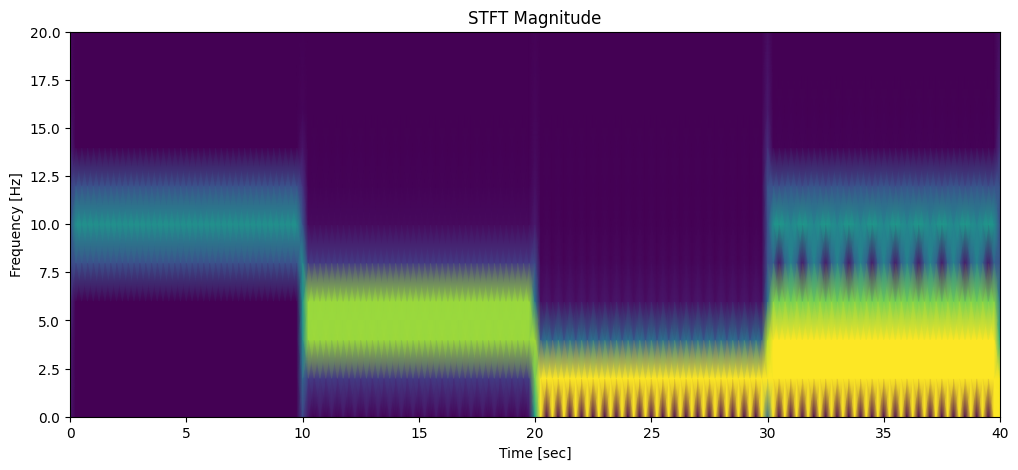

In [20]:
calc_stft(500)

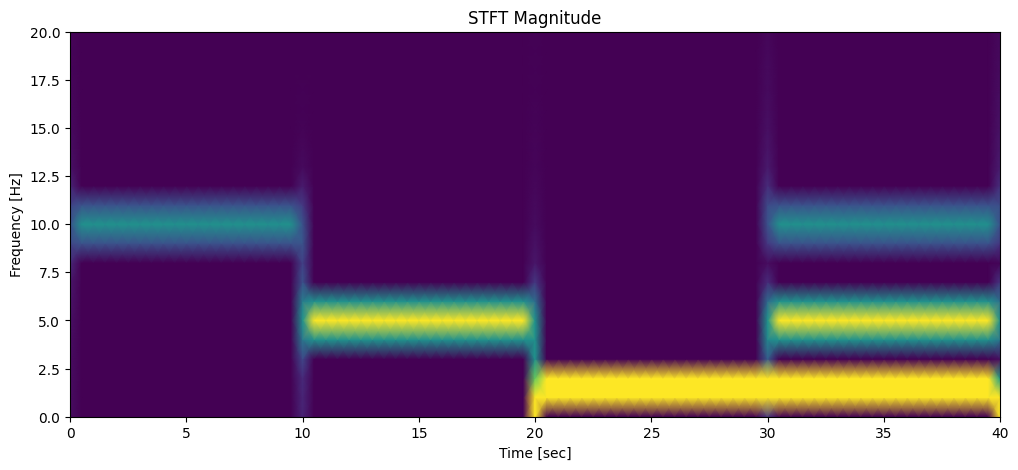

In [21]:
calc_stft(1000)

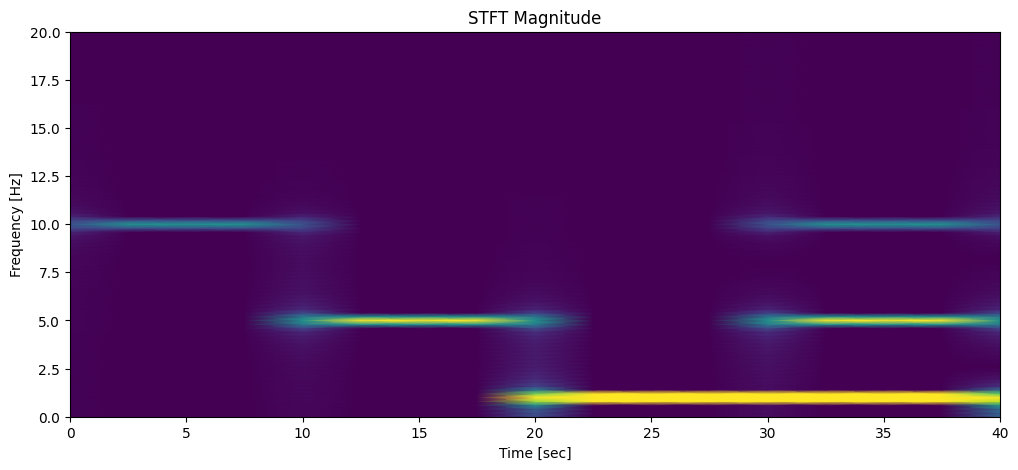

In [23]:
calc_stft(5000)

### LIBROSA

In [1]:
import librosa.display, librosa
import IPython.display
import warnings
import numpy as np
import matplotlib.pyplot as plt

In [2]:
warnings.simplefilter("ignore")

In [3]:
def sin_wave(amp, freq, time):
    return amp * np.sin(2*np.pi*freq*time)

In [4]:
sr = 22*1000.
ts = 1/sr

time = np.arange(0, 1, ts)
DO = sin_wave(1, 261.6256, time)
MI = sin_wave(1, 329.6276, time)
SOL = sin_wave(1, 391.9954, time)

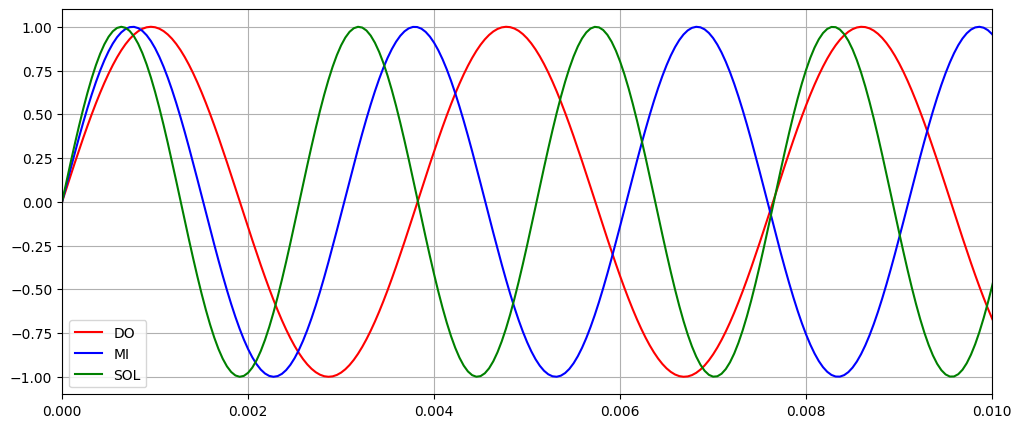

In [5]:
plt.figure(figsize=(12,5))
plt.plot(time, DO, label="DO", color='red')
plt.plot(time, MI, label="MI", color='blue')
plt.plot(time, SOL, label="SOL", color='green')
plt.xlim((0, 0.01))
plt.legend(); plt.grid(); plt.show()

In [6]:
IPython.display.Audio(data=DO, rate=sr)

In [7]:
sample_concat = np.concatenate((DO, MI, SOL))
sample_concat.shape

(66000,)

In [8]:
IPython.display.Audio(data=sample_concat, rate=sr)

In [9]:
def draw_wave(sample_sounds):
    plt.figure(figsize=(12,6))
    librosa.display.waveshow(sample_sounds, alpha=0.2)
    plt.xlabel("Time (s)"); plt.ylabel("Amplitude")
    plt.title("Waveform"); plt.show()

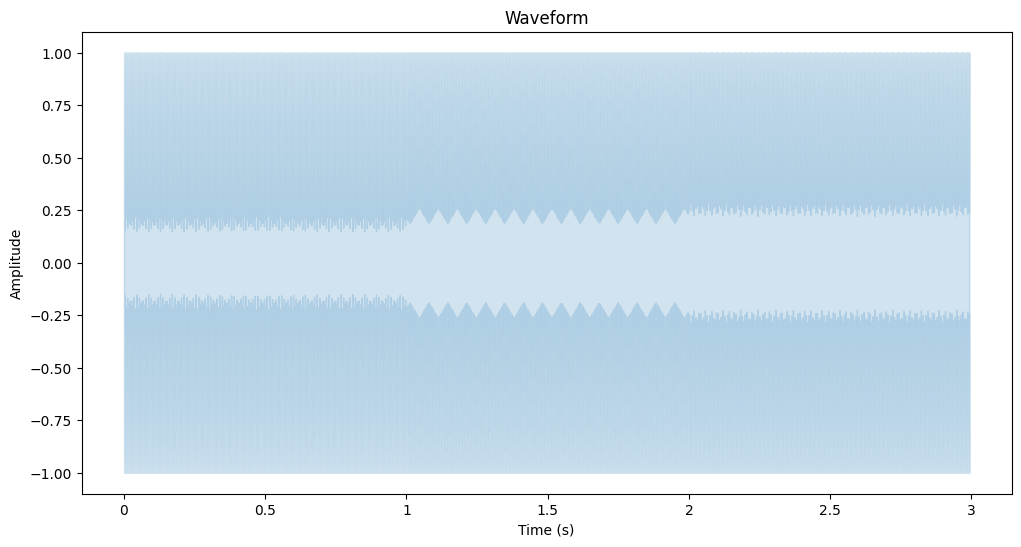

In [10]:
draw_wave(sample_concat)

In [11]:
def get_stft(sample_sounds):
    return librosa.stft(sample_sounds)

In [12]:
def draw_stft(sample_sounds, ylim=(None, None)):
    plt.figure(figsize=(12,6))
    librosa.display.specshow(np.abs(get_stft(sample_sounds)),
                             y_axis='hz', x_axis='s')
    plt.ylim(ylim); plt.grid(); plt.show()

    plt.ylim(ylim); plt.grid(); plt.show()

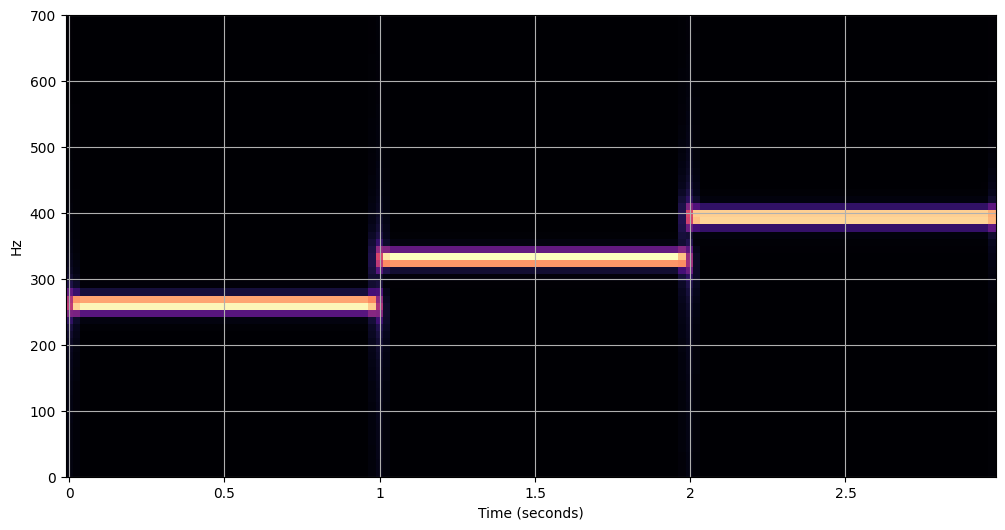

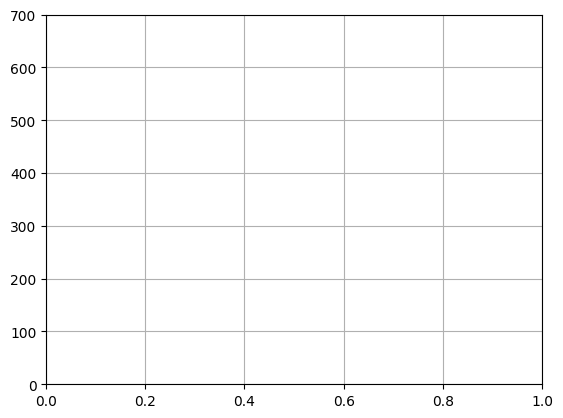

In [13]:
draw_stft(sample_concat, ylim=(0,700))

In [14]:
def get_chroma(sample_sounds, sr):
    return librosa.feature.chroma_stft(S=np.abs(get_stft(sample_sounds)),
                                       sr=sr)

In [15]:
def draw_chroma(sample_sounds, sr):
    plt.figure(figsize=(12,6))
    librosa.display.specshow(get_chroma(sample_sounds, sr),
                             y_axis='chroma', x_axis='time')
    plt.grid(); plt.show()

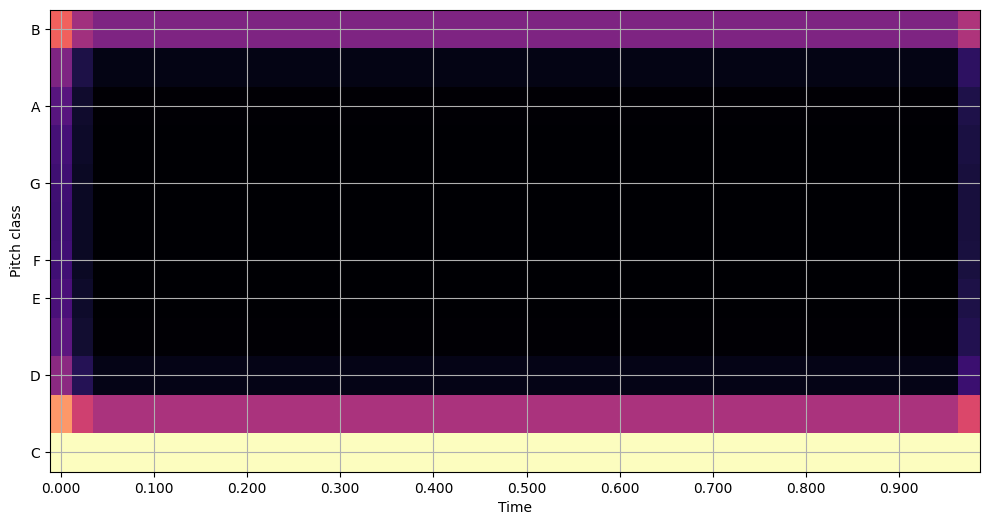

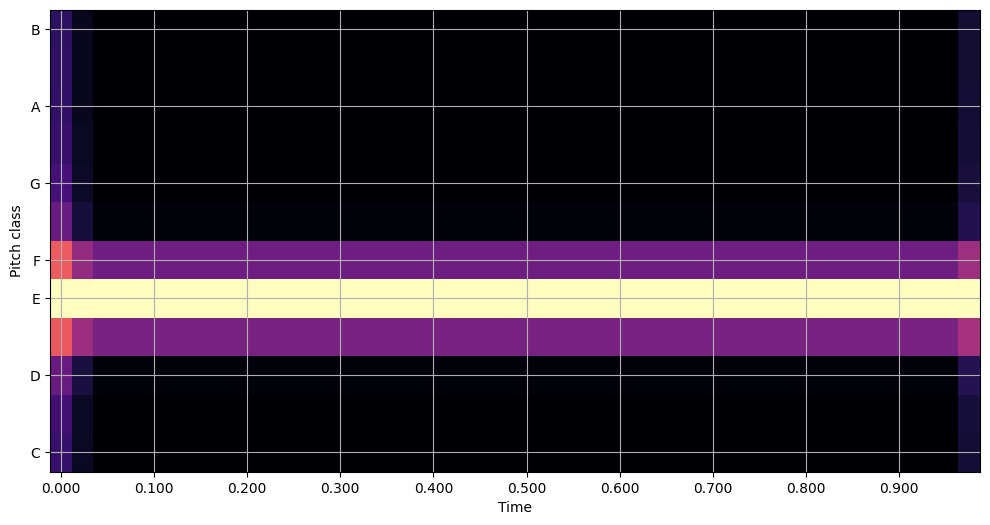

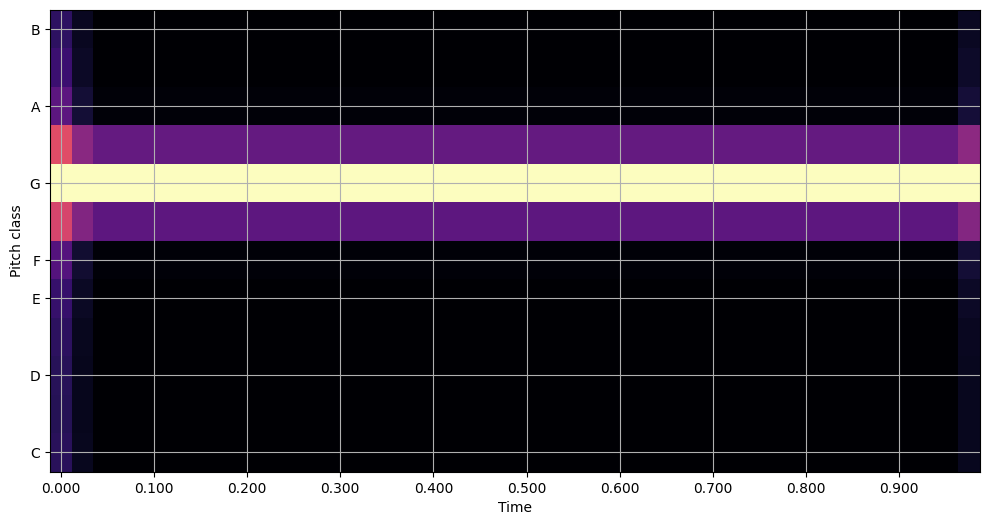

In [17]:
draw_chroma(DO, sr)
draw_chroma(MI, sr)
draw_chroma(SOL, sr)

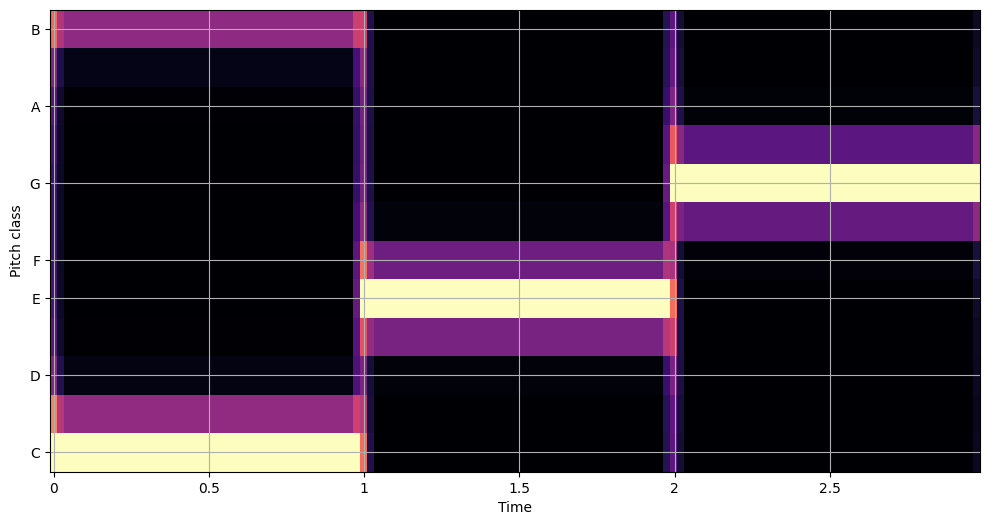

In [18]:
draw_chroma(sample_concat, sr)

In [19]:
sum_samples = sum([DO, MI, SOL])
sum_samples.shape

(22000,)

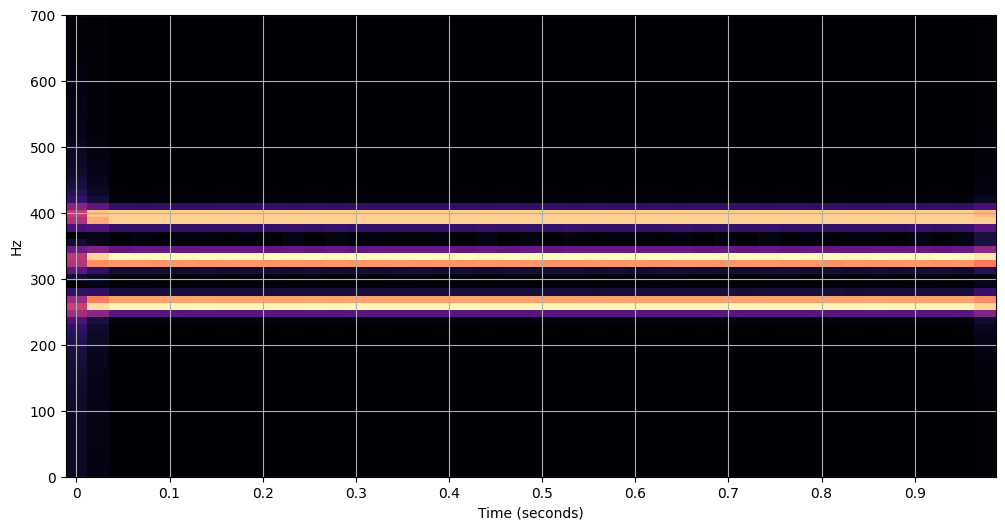

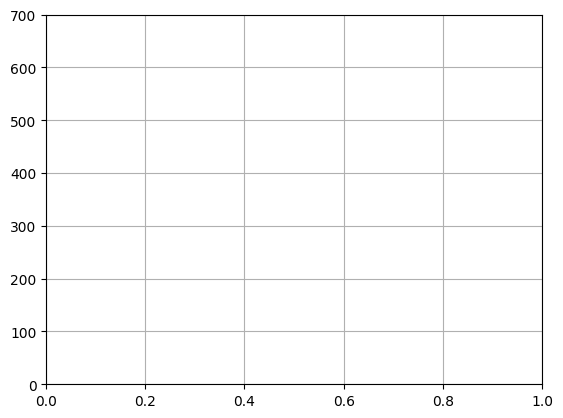

In [20]:
draw_stft(sum_samples, ylim=(0, 700))

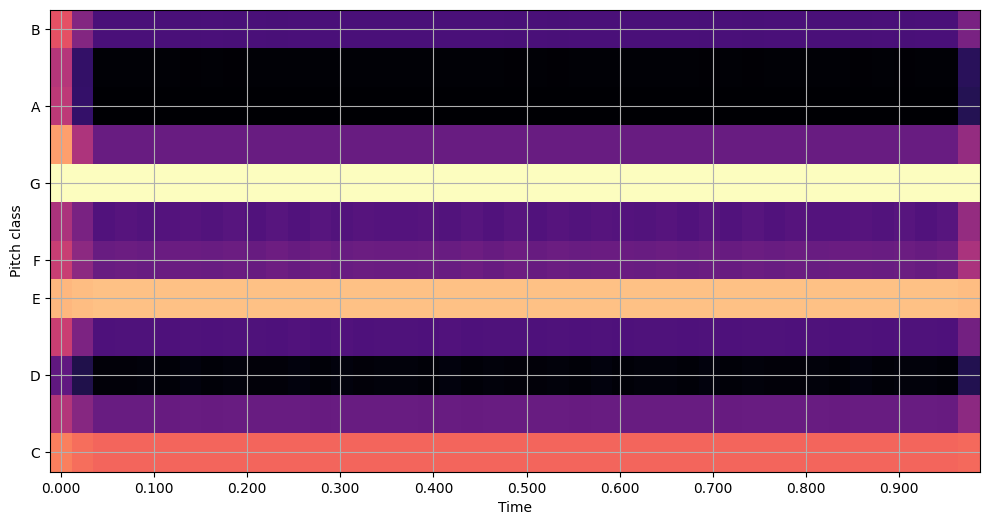

In [21]:
draw_chroma(sum_samples, sr)

In [22]:
IPython.display.Audio(data=sum_samples, rate=sr)

In [26]:
piano, sr = librosa.core.load('../data/piano.wav')

In [27]:
IPython.display.Audio(data=piano, rate=sr)

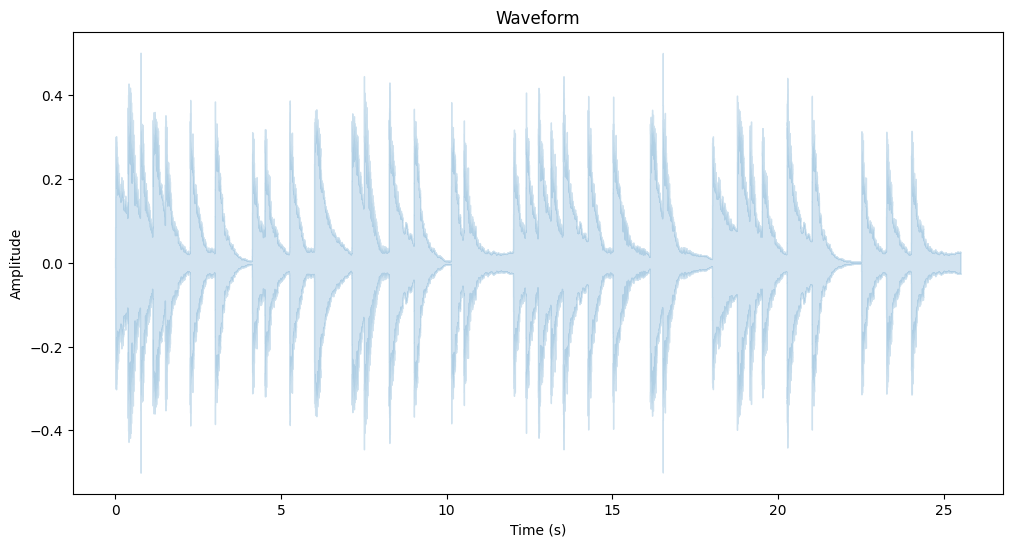

In [28]:
draw_wave(piano)

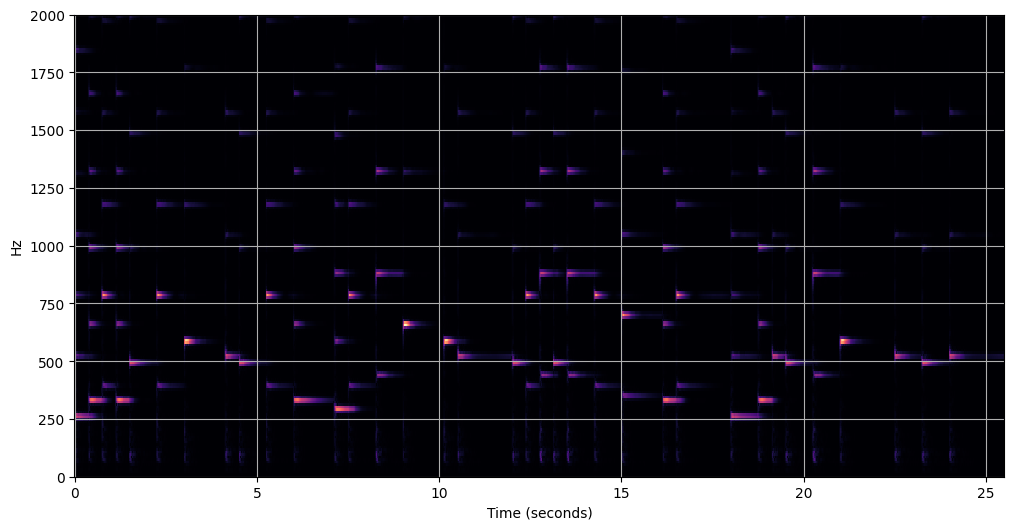

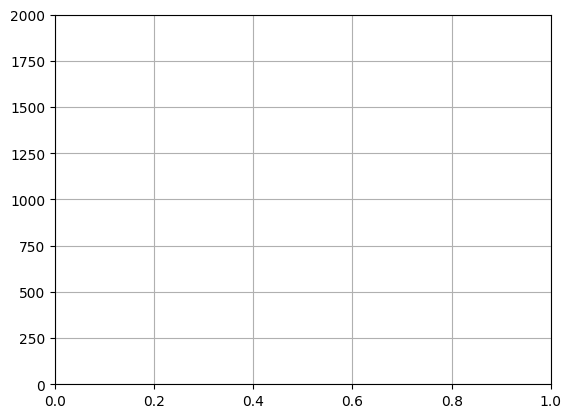

In [29]:
draw_stft(piano, ylim=(0,2000))

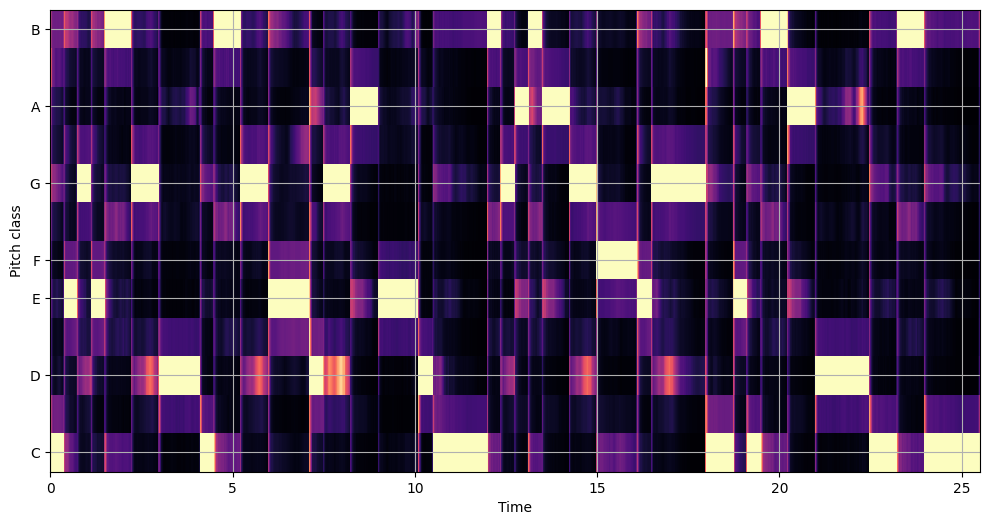

In [30]:
draw_chroma(piano, sr)

In [33]:
flute, sr = librosa.core.load('../data/flute.wav')
IPython.display.Audio(data=flute, rate=sr)

In [34]:
guitar, sr = librosa.core.load('../data/guitar.wav')
IPython.display.Audio(data=guitar, rate=sr)

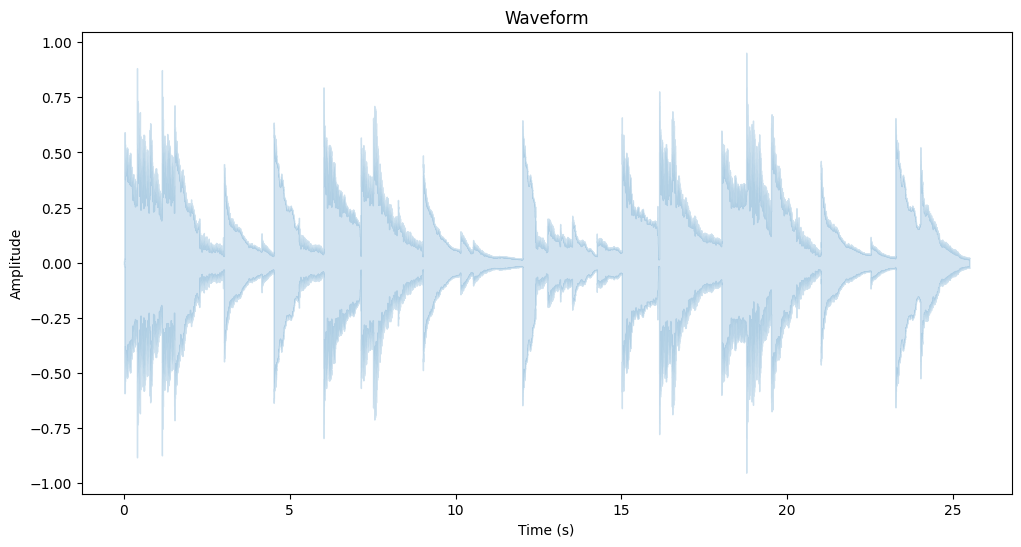

In [35]:
draw_wave(guitar)

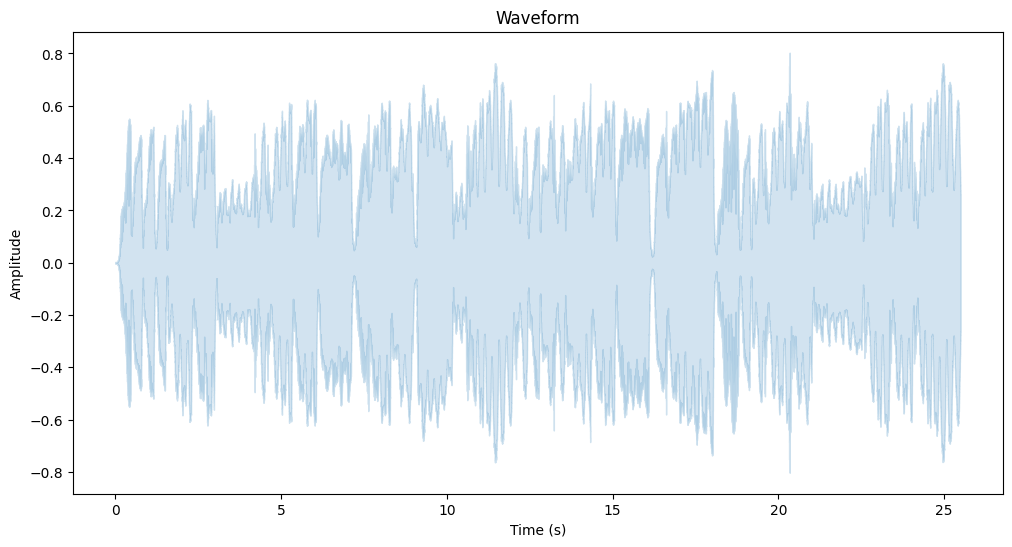

In [36]:
draw_wave(flute)

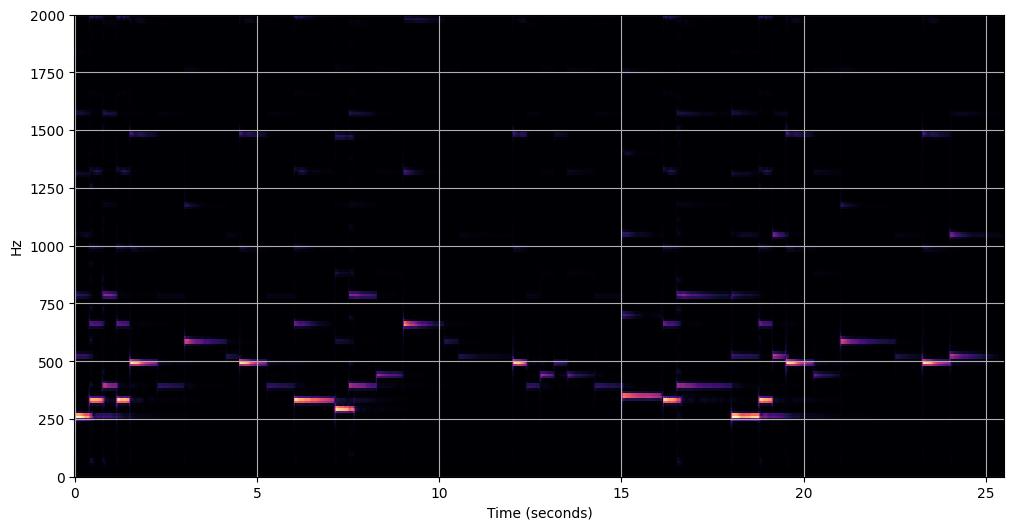

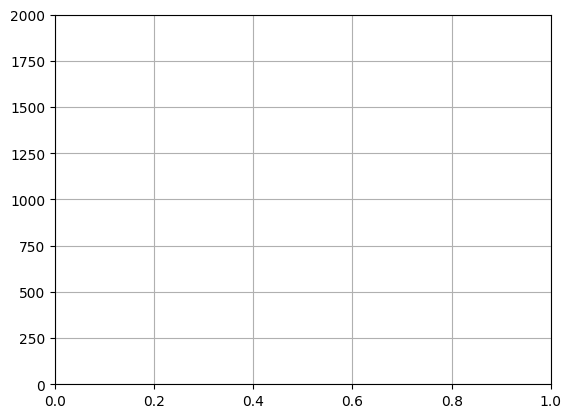

In [37]:
draw_stft(guitar, ylim=(0,2000))

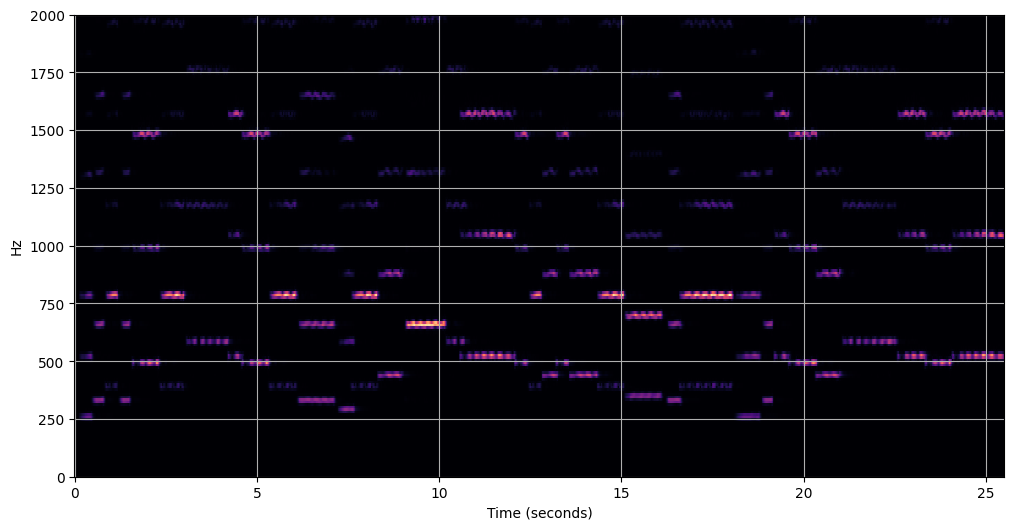

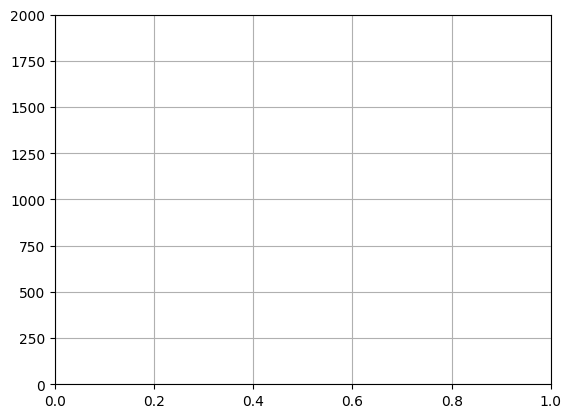

In [38]:
draw_stft(flute, ylim=(0,2000))

In [40]:
sum_inst = sum([piano*2, guitar, flute*1.2])
sum_inst.shape

(562275,)

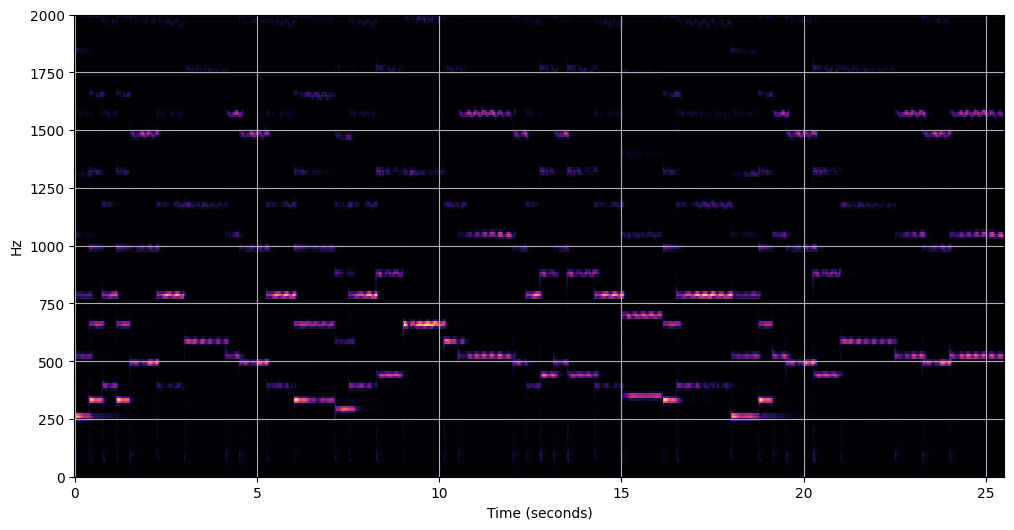

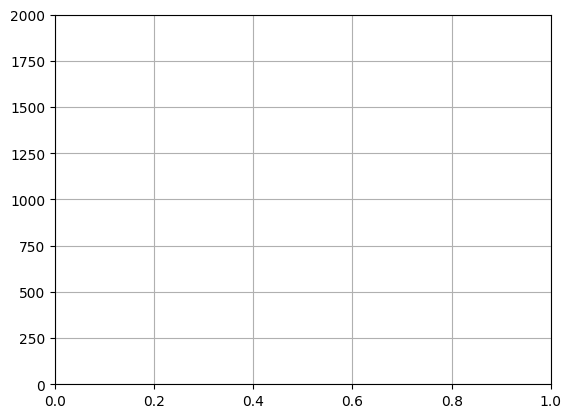

In [41]:
draw_stft(sum_inst, ylim=(0, 2000))

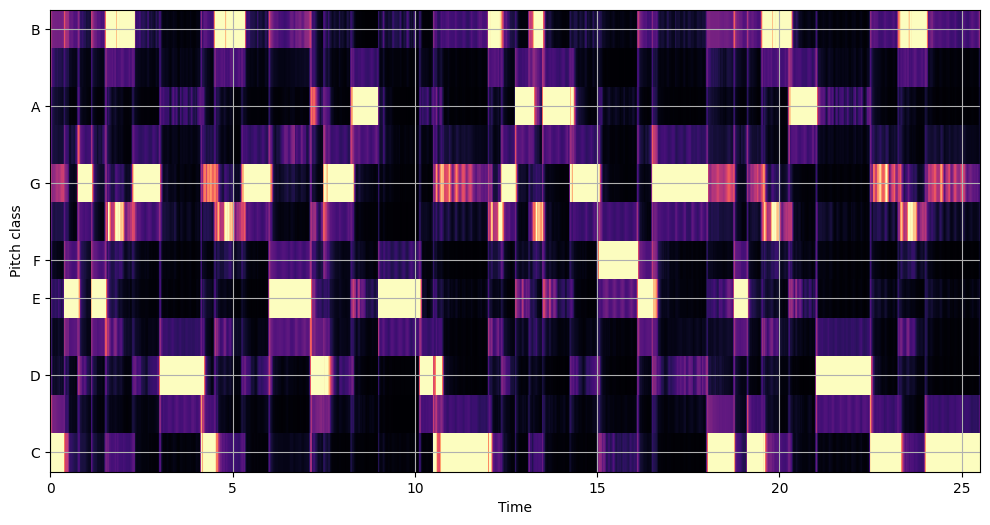

In [42]:
draw_chroma(sum_inst, sr)